# Lab 7 - Linear Models, Cost Functions, and Regularization
- **Author:** Suraj R. Nair([suraj.nair@berkeley.edu](mailto:suraj.nair@berkeley.edu))
- **Date:** February 28, 2024
- **Course:** INFO 251: Applied machine learning

## Learning objectives:
At the end of this lab, you will be able to...
- Train a linear model end-to-end by defining the model, the cost function, and the regularization, taking partial derivatives, and running gradient descent
- Understand the differences between common loss functions
- Compare Ridge and LASSO regularization, and optimize both with gradient descent
- Use cross validation to find the optimal regularization parameter for Ridge and LASSO

## Topics:
1. Cross validation to find the optimal regularization parameter

**NOTE:** The other topics in this lab are covered in the lecture and participatory activities.

## Resources:
1. [Loss functions cheat sheet](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html)
2. [Gradient descent for linear regression lecture notes](https://www.cs.toronto.edu/~rgrosse/courses/csc321_2017/readings/L02%20Linear%20Regression.pdf)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.metrics import r2_score

## 1. Cross validation to find the optimal regularization parameter

In [2]:
# Load data, drop columns with nulls
df = pd.read_csv('auto.csv')
outcome = 'acceleration'
features = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'year']
for feature in features:
    df[feature] = df[feature].apply(lambda x: np.nan if x == '?' else float(x))
df = df.dropna(subset = [outcome] + features)

In [3]:
# Divide into random train set (75%) and test set (25%)
train, test = train_test_split(df, test_size=.25, shuffle=True, random_state=1)
print('Number of training observations: %i' % len(train))
print('Number of testing observations: %i' % len(test))

# Separate output from inputs
x_train, y_train = train[features], train[outcome]
x_test, y_test = test[features], test[outcome]

Number of training observations: 294
Number of testing observations: 98


In [4]:
# Train a linear regression on the training set, produce predictions on the train + test set

model = LinearRegression()
model.fit(x_train, y_train)
yhat_train = model.predict(x_train)
yhat_test = model.predict(x_test)

print('Linear regression r2 on training set: %.2f' % r2_score(y_train, yhat_train))
print('Linear regression r2 on test set: %.2f' % r2_score(y_test, yhat_test))

Linear regression r2 on training set: 0.62
Linear regression r2 on test set: 0.56


In [5]:
# Train a LASSO regression on the training set, produce predictions on the train + test set
model = Lasso(alpha=1)
model.fit(x_train, y_train)
yhat_train = model.predict(x_train)
yhat_test = model.predict(x_test)

print('Linear regression r2 on training set: %.2f' % r2_score(y_train, yhat_train))
print('Linear regression r2 on test set: %.2f' % r2_score(y_test, yhat_test))

Linear regression r2 on training set: 0.62
Linear regression r2 on test set: 0.58


In [6]:
# Use 5 fold cross validation to determine the optimal LASSO on the training set
kf = KFold(n_splits=5, random_state=12, shuffle=True)

lmbdas, scores = np.logspace(-3, 1, 20), []
for lmbda in lmbdas:
    model = Lasso(alpha=lmbda, random_state=1)
    scores.append(np.mean(cross_val_score(model, x_train, y_train, scoring='r2', cv=kf)))

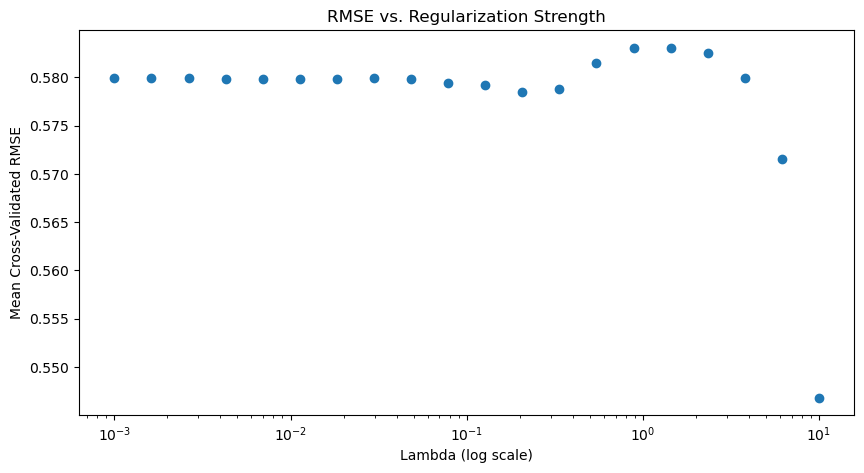

In [7]:
# Plot cross-validated r2 as a function of regularization strength
fig, ax = plt.subplots(1, figsize=(10, 5))
ax.scatter(lmbdas, scores)
ax.set_xscale('log')
ax.set_xlabel('Lambda (log scale)')
ax.set_ylabel('Mean Cross-Validated RMSE')
ax.set_title('RMSE vs. Regularization Strength')
plt.show()

In [8]:
# Get best lambda value
print('Maximum cross-validated r2: %.2f' % np.max(scores))
best_lmbda = lmbdas[np.argmax(scores)]
print('Lambda associated with best maximum cross-validated r2: %.2f' % best_lmbda)

Maximum cross-validated r2: 0.58
Lambda associated with best maximum cross-validated r2: 1.44


In [9]:
# Fit LASSO with optimal lambda on train set, predict on training and test set
model = Lasso(alpha=best_lmbda, random_state=2)
model.fit(x_train, y_train)
yhat_train = model.predict(x_train)
yhat_test = model.predict(x_test)

print('Linear regression r2 on training set: %.2f' % r2_score(y_train, yhat_train))
print('Linear regression r2 on test set: %.2f' % r2_score(y_test, yhat_test))

Linear regression r2 on training set: 0.62
Linear regression r2 on test set: 0.58


In [25]:
# Alternative: Use sklearn's built-in LassoCV functionality
model = LassoCV(random_state = 12,  alphas = lmbdas, cv = 5)
model.fit(x_train, y_train)
yhat_train = model.predict(x_train)
yhat_test = model.predict(x_test)

print('Linear regression r2 on training set: %.2f' % r2_score(y_train, yhat_train))
print('Linear regression r2 on test set: %.2f' % r2_score(y_test, yhat_test))
print('Chosen lambda value: %.2f' % model.alpha_)

Linear regression r2 on training set: 0.62
Linear regression r2 on test set: 0.56
Chosen lambda value: 0.05


In [16]:
lmbdas

array([1.00000000e-03, 1.62377674e-03, 2.63665090e-03, 4.28133240e-03,
       6.95192796e-03, 1.12883789e-02, 1.83298071e-02, 2.97635144e-02,
       4.83293024e-02, 7.84759970e-02, 1.27427499e-01, 2.06913808e-01,
       3.35981829e-01, 5.45559478e-01, 8.85866790e-01, 1.43844989e+00,
       2.33572147e+00, 3.79269019e+00, 6.15848211e+00, 1.00000000e+01])